In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset
data = pd.DataFrame({
    'Age': [25, 30, 22, np.nan, 35, 28, 40, np.nan, 45, 32],
    'Income': [50000, 60000, np.nan, 75000, 80000, np.nan, 90000, 55000, np.nan, 72000],
    'Education': ['Bachelor', 'Master', 'High School', 'PhD', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'High School', 'Master'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male']
})

In [39]:
print(data)

    Age   Income    Education  Gender
0  25.0  50000.0     Bachelor    Male
1  30.0  60000.0       Master  Female
2  22.0      NaN  High School    Male
3   NaN  75000.0          PhD  Female
4  35.0  80000.0     Bachelor    Male
5  28.0      NaN       Master    Male
6  40.0  90000.0          PhD  Female
7   NaN  55000.0     Bachelor    Male
8  45.0      NaN  High School  Female
9  32.0  72000.0       Master    Male


In [18]:
missing_data = data.isna()
missing_data

,Age,Income,Education,Gender
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,False,False,False,False
7,True,False,False,False
8,False,True,False,False
9,False,False,False,False


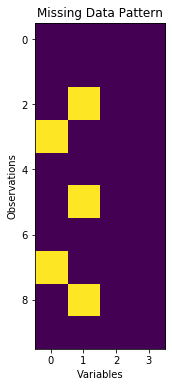

In [22]:
plt.figure(figsize=(10,6))
plt.imshow(missing_data)

plt.xlabel('Variables')
plt.ylabel('Observations')
plt.title('Missing Data Pattern')

plt.show()

In [27]:
missing_data = data.isna().sum()
missing_data

Age          2
Income       3
Education    0
Gender       0
dtype: int64

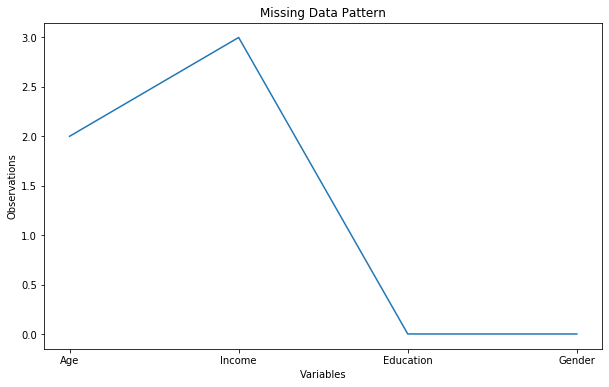

In [28]:
plt.figure(figsize=(10,6))
plt.plot(missing_data)

plt.xlabel('Variables')
plt.ylabel('Observations')
plt.title('Missing Data Pattern')

plt.show()

In [33]:
missing_data = data.isnull()

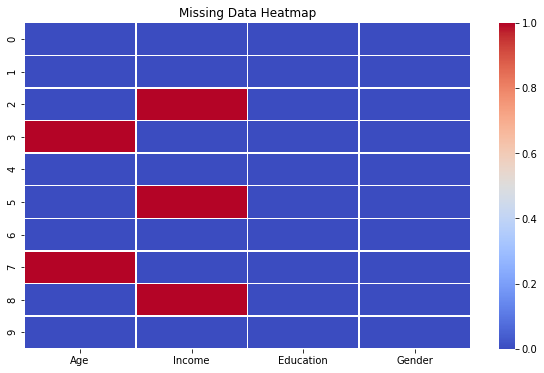

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(missing_data, cmap='coolwarm', linewidths=0.5)
plt.title('Missing Data Heatmap')
plt.show()

In [36]:
#Next, let's check for the MAR pattern by calculating the correlation matrix:

In [40]:
correlation_matrix = data.corr() #only on numerical value
correlation_matrix

,Age,Income
Age,1.000000,0.985322
Income,0.985322,1.000000


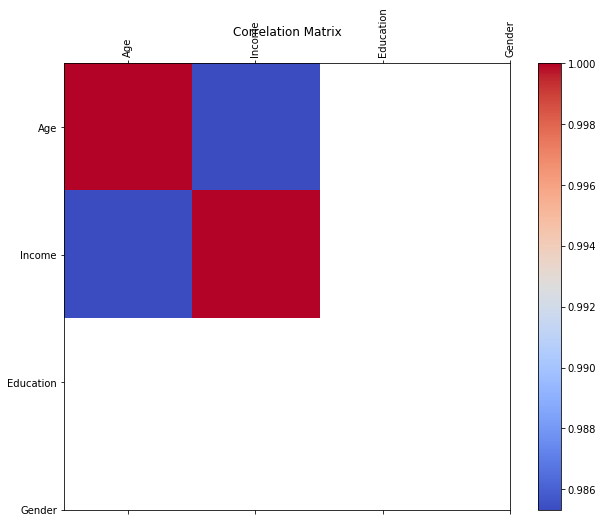

In [42]:
# Visualize the correlation matrix to check for MAR
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.show()

In [43]:
data.describe()

,Age,Income
count,8.000000,7.000000
mean,32.125000,68857.142857
std,7.661359,14404.033827
min,22.000000,50000.000000
25%,27.250000,57500.000000
50%,31.000000,72000.000000
75%,36.250000,77500.000000
max,45.000000,90000.000000


In [51]:
df1 = pd.read_csv('train.csv')

In [52]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [48]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
for i in df1.columns:
    if df1[i].isnull().sum() > 1:
        print(f"{i}:-",df1[i].isnull().sum())

LotFrontage:- 259
Alley:- 1369
MasVnrType:- 8
MasVnrArea:- 8
BsmtQual:- 37
BsmtCond:- 37
BsmtExposure:- 38
BsmtFinType1:- 37
BsmtFinType2:- 38
FireplaceQu:- 690
GarageType:- 81
GarageYrBlt:- 81
GarageFinish:- 81
GarageQual:- 81
GarageCond:- 81
PoolQC:- 1453
Fence:- 1179
MiscFeature:- 1406


Visual Inspection:

c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


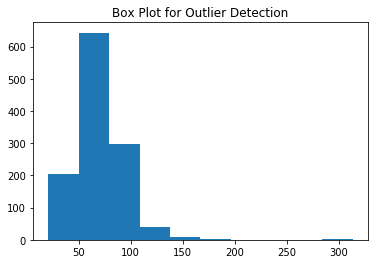

In [63]:
plt.hist(df1['LotFrontage'])
#plt.xlabel('Column Name')
plt.title('Box Plot for Outlier Detection')
plt.show()

Summary Statistics: